# Objectives 
- 고객의 대출 등급에 따른 분류
- EDA(탐색적데이터탐색) 이후 isnull().sum(), 단위제거 및 자료형 변환 
- pd.concat, Feature Engineering

train.csv [파일] 
고객 관련 금융 정보
ID : 대출 고객의 고유 ID
대출등급 : 예측 목표


test.csv [파일]
고객 관련 금융 정보
ID : 대출 고객의 고유 ID
대출등급이 존재하지 않음


sample_submission.csv [파일] - 제출 양식
ID : 대출 고객의 고유 ID
대출등급 : test.csv에서 제공된 고객의 대출등급을 예측하여 기입


## Import Functions

In [59]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Load Train Data

In [60]:
# 학습용 데이터 불러오기

train_path = 'D:\Code\[중]고객 대출 등급 분류 해커톤/train.csv'

df_train = pd.read_csv(train_path)

print(f'학습용 데이터 : \n{df_train}')

df_train.isnull().sum()

# 누락 데이터 없음

학습용 데이터 : 
                ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0      TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1      TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2      TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3      TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4      TRAIN_00004  18000000   60 months    Unknown      RENT   71736000   
...            ...       ...         ...        ...       ...        ...   
96289  TRAIN_96289  14400000   36 months  10+ years  MORTGAGE  210000000   
96290  TRAIN_96290  28800000   60 months  10+ years  MORTGAGE  132000000   
96291  TRAIN_96291  14400000   36 months     1 year  MORTGAGE   84000000   
96292  TRAIN_96292  15600000   36 months    5 years  MORTGAGE   66330000   
96293  TRAIN_96293   8640000   36 months  10+ years      RENT   50400000   

       부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  \
0

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [90]:
# 정답, 레이블 컬럼 : 대출등급
label = df_train.loc[:,'대출등급']

cleaned_df=df_train.drop(columns=['대출등급'])

print('*'*80)

print(label)

print('*'*80)

print(cleaned_df)

print('*'*80)



********************************************************************************
0        C
1        B
2        A
3        C
4        B
        ..
96289    C
96290    E
96291    A
96292    D
96293    C
Name: 대출등급, Length: 96294, dtype: object
********************************************************************************
                ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0      TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1      TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2      TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3      TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4      TRAIN_00004  18000000   60 months    Unknown      RENT   71736000   
...            ...       ...         ...        ...       ...        ...   
96289  TRAIN_96289  14400000   36 months  10+ years  MORTGAGE  210000000   
96290  TRAIN_96290  28800000   60 months  10+ years  MORTGAGE  13200

In [91]:
label.value_counts()

대출등급
B    28817
C    27623
A    16772
D    13354
E     7354
F     1954
G      420
Name: count, dtype: int64

In [93]:
print(df_train)

                ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0      TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1      TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2      TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3      TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4      TRAIN_00004  18000000   60 months    Unknown      RENT   71736000   
...            ...       ...         ...        ...       ...        ...   
96289  TRAIN_96289  14400000   36 months  10+ years  MORTGAGE  210000000   
96290  TRAIN_96290  28800000   60 months  10+ years  MORTGAGE  132000000   
96291  TRAIN_96291  14400000   36 months     1 year  MORTGAGE   84000000   
96292  TRAIN_96292  15600000   36 months    5 years  MORTGAGE   66330000   
96293  TRAIN_96293   8640000   36 months  10+ years      RENT   50400000   

       부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  \
0           

### Label Encoding

In [92]:
kind1 = np.unique(df_train.loc[:,'대출등급'].values)
print(kind1)

['A' 'B' 'C' 'D' 'E' 'F' 'G']


In [95]:
kind2 = np.unique(df_train.loc[:,'근로기간'].values)
print(kind2)



['1 year' '1 years' '10+ years' '10+years' '2 years' '3' '3 years'
 '4 years' '5 years' '6 years' '7 years' '8 years' '9 years' '< 1 year'
 '<1 year' 'Unknown']
6


# EDA

c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human\anacon

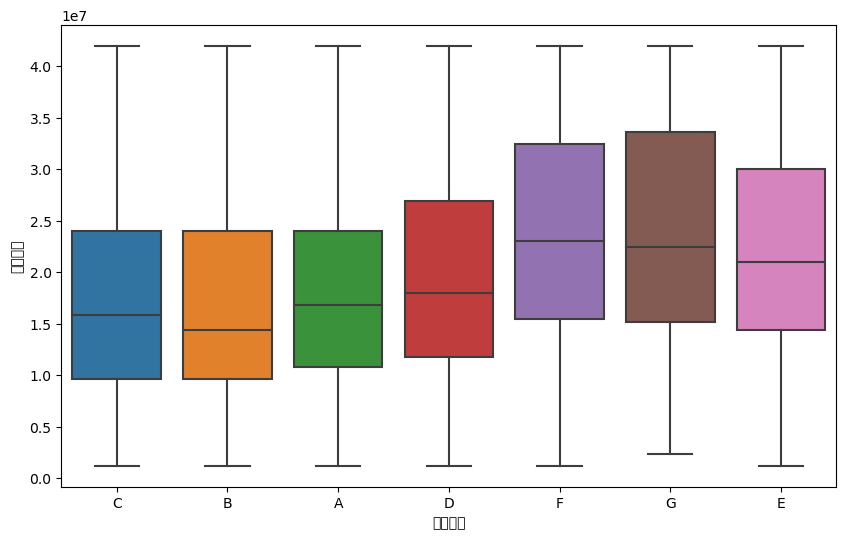

In [65]:
### 고객의 대출금액과 고객의 대출등급과의 관계 분석

sns.boxplot(data=df_train, x='대출등급', y='대출금액')
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

In [66]:
'''

대출금액이 올라갈수록 대출등급이 떨어지거나 하는 뚜렷한 인과는 없지만

대출등급이 높은 집단들은 대부분 대출금액이 적당한 선을 유지하는 것으로 해석된다

'''



'\n\n대출금액이 올라갈수록 대출등급이 떨어지거나 하는 뚜렷한 인과는 없지만\n\n대출등급이 높은 집단들은 대부분 대출금액이 적당한 선을 유지하는 것으로 해석된다\n\n'

c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human\anaconda3

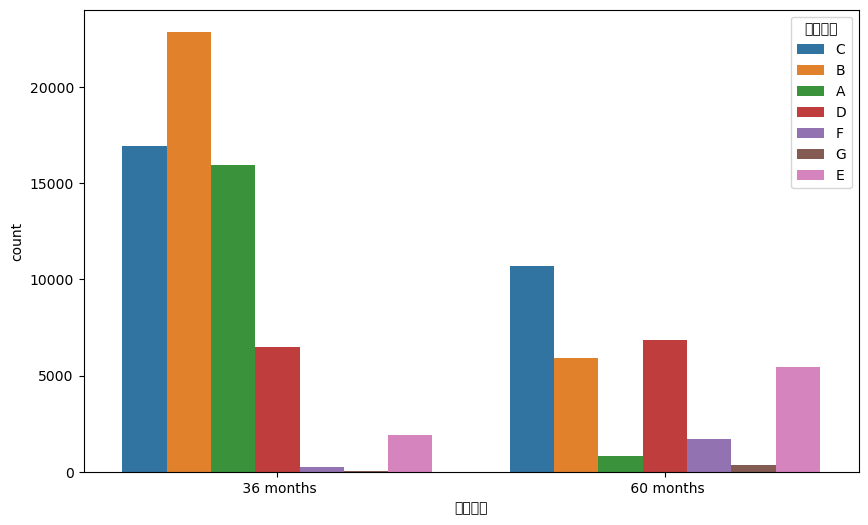

In [67]:
### 고객의 대출기간과 고객의 대출등급의 관계 분석

sns.countplot(data=df_train, x='대출기간', hue='대출등급')
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

In [68]:
'''

36개월 대출한 집단들 중 대출등급 B인원이 제일 많고 F인원이 제일 적다.

60개월 대출한 집단들 중 대출등급 C인원이 제일 많고 G인원이 제일 적다.

이와 같은 결과로 보다 대출등급이 높은 인원일수록 대출이 많고

대출한 개월이 많을수록 대출등급이 낮은 인원들의 수는 감소가 된다.

어찌보면 당연한 사실이다.

'''

'\n\n36개월 대출한 집단들 중 대출등급 B인원이 제일 많고 F인원이 제일 적다.\n\n60개월 대출한 집단들 중 대출등급 C인원이 제일 많고 G인원이 제일 적다.\n\n이와 같은 결과로 보다 대출등급이 높은 인원일수록 대출이 많고\n\n대출한 개월이 많을수록 대출등급이 낮은 인원들의 수는 감소가 된다.\n\n어찌보면 당연한 사실이다.\n\n'

c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human\anacon

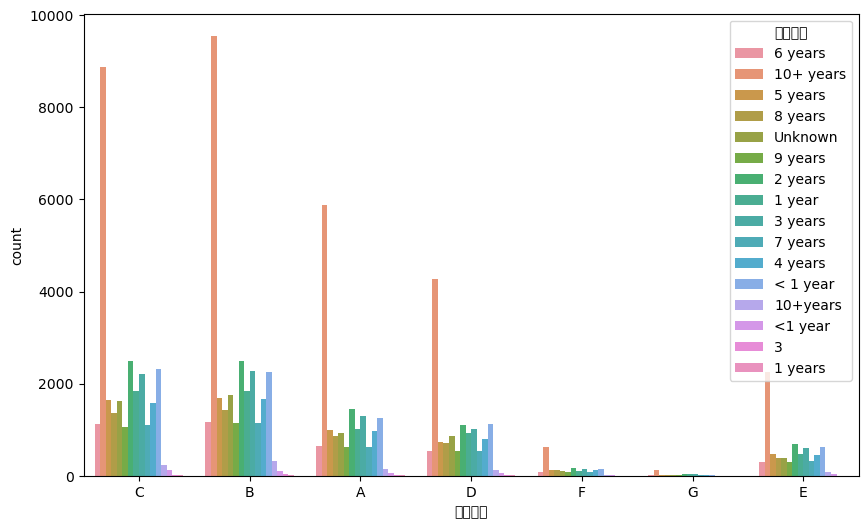

In [69]:
### 근로기간과 고객의 대출등급과의 관계 분석

sns.countplot(data=df_train, x='대출등급', hue='근로기간')
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

In [70]:
'''

10년 이상 근로한 인원이 제일 많은 집단은 B그룹이며, C A D E F G 순서대로 이어진다.

근로한 인원이 높을수록 대출등급자체가 높은 것으로 보인다.

'''



'\n\n10년 이상 근로한 인원이 제일 많은 집단은 B그룹이며, C A D E F G 순서대로 이어진다.\n\n근로한 인원이 높을수록 대출등급자체가 높은 것으로 보인다.\n\n'

c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human\anaconda3\L

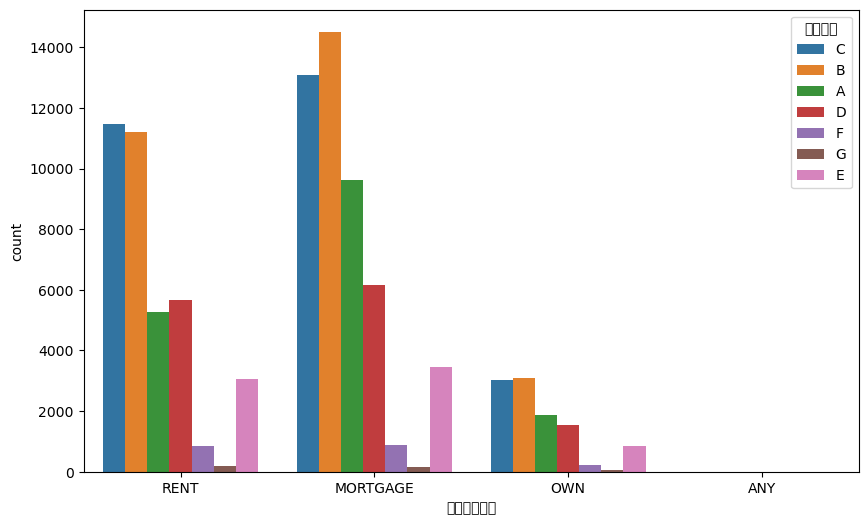

In [71]:
### 주택소유상태와 고객의 대출등급과의 관계 분석

sns.countplot(data=df_train, x='주택소유상태', hue='대출등급')
plt.rcParams['figure.figsize'] = [10,6]
plt.show()


In [72]:
print(df_train)

df_train.isnull().sum()

## 대출기간 컬럼

print('36 months'.split()[0])

cleaned_df.loc[:,'대출기간'] = cleaned_df.loc[:,'대출기간'].apply(lambda x: x.split()[0])
print(cleaned_df)

                ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0      TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1      TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2      TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3      TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4      TRAIN_00004  18000000   60 months    Unknown      RENT   71736000   
...            ...       ...         ...        ...       ...        ...   
96289  TRAIN_96289  14400000   36 months  10+ years  MORTGAGE  210000000   
96290  TRAIN_96290  28800000   60 months  10+ years  MORTGAGE  132000000   
96291  TRAIN_96291  14400000   36 months     1 year  MORTGAGE   84000000   
96292  TRAIN_96292  15600000   36 months    5 years  MORTGAGE   66330000   
96293  TRAIN_96293   8640000   36 months  10+ years      RENT   50400000   

       부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  \
0           

In [75]:
## 근로기간 컬럼

print('6 years'.split()[0])

cleaned_df.loc[:,'근로기간'] = cleaned_df.loc[:, '근로기간'].apply(lambda x: x.split()[0])

print('*'*80)

print('10 +years'.split()[0])

cleaned_df.loc[:,'근로기간'] = cleaned_df.loc[:,'근로기간'].apply(lambda x:x.split()[0])

print('*'*80)

6
********************************************************************************
10
